# Slicing the LCH space
---
This notebook is part 4/5 of a tutorial based on the [```colourspace```](https://github.com/gillesferrand/colourspace) package.

In [1]:
from colourspace import slices

convertor = 'custom' (illuminant = 'D65')


The ```slices``` module allows us to slice the LCH space along its principal axes, to get a better intuition of its structure.

For any slice we make in the LCH space, we can use the conversion functions from ```convert``` to convert them to the RGB space, in which we can display them.<br>
Knowing the gamut boundaries, of the display ("sRGB"), and of humans ("full"), as explained in the previous notebooks using ```gamut```, we can properly deal with out-of-gamut colours that may happen. (The resolution used for the tabulated gamuts is controlled by module parameter ```res_gamut```.) <br>
When a colour is outside the human gamut, it is replaced with black. <br>
When a colour is outside the sRGB gamut:<br>
\- for ```mode='crop'``` the colour is discarded: it is replaced with a gray of the same L<br>
\- for ```mode='clip'``` the colour is faked: the R,G,B values are clipped to [0,1]<br>
The latter mode produces more vivid colours, but there are uncontrolled L, C, H shifts, only the former mode can produce correct slices. Images for both modes are generated, and by default both are plotted and written to disk.

We will slice the space along its three principal axes, using the functions<br>
```LH_plane(C)```<br>
```CH_plane(L)```<br>
```LC_plane(H)```<br>
Function ```IJ_plane(K)``` returns the IJ plane at constant K, as a NumPy array. For each of these is also provided a convenience function ```IJ_planes(K)``` which generates all the planes for a given range of a K.<br>
LH planes will also be generated for the max possible C.<br>
CH planes and LC planes will also be generated with C stretched to the Cmax.<br>
Function ```all_planes()``` generates all of these.

In [2]:
import numpy as np
%matplotlib inline

In [3]:
plot_dir = "./slices"
dpi = 200

## LH slice for a given C

In [4]:
figsize = (12,12/3.6)

This is the surface of a cylinder of radius C, that we display here unfolded.

loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_sRGB.npy
loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full.npy
writing ./slices/LHplane_crop_axon_C020.png
writing ./slices/LHplane_crop_axon_C040.png
writing ./slices/LHplane_crop_axon_C060.png
writing ./slices/LHplane_crop_axon_C080.png
writing ./slices/LHplane_crop_axon_C100.png
writing ./slices/LHplane_crop_axon_C120.png
CPU times: user 480 ms, sys: 30.9 ms, total: 511 ms
Wall time: 517 ms


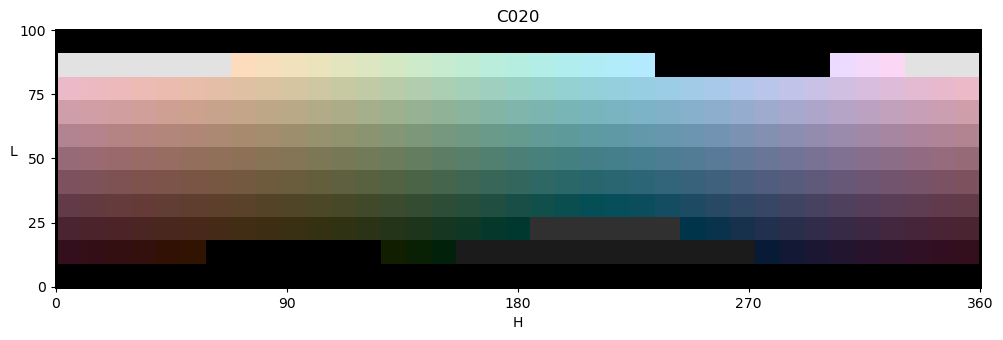

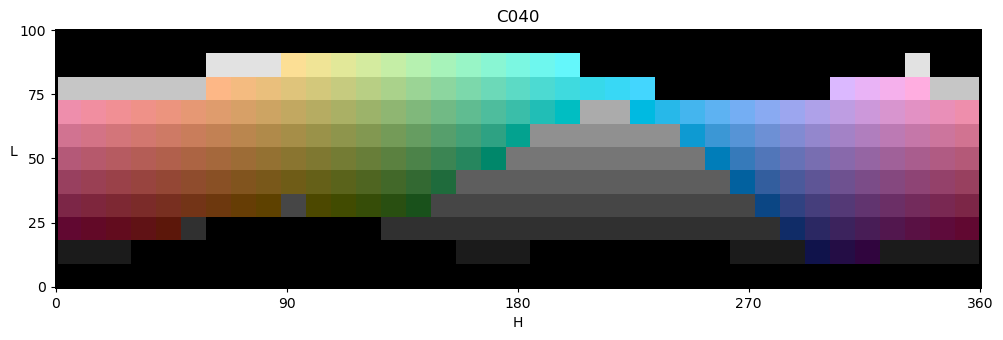

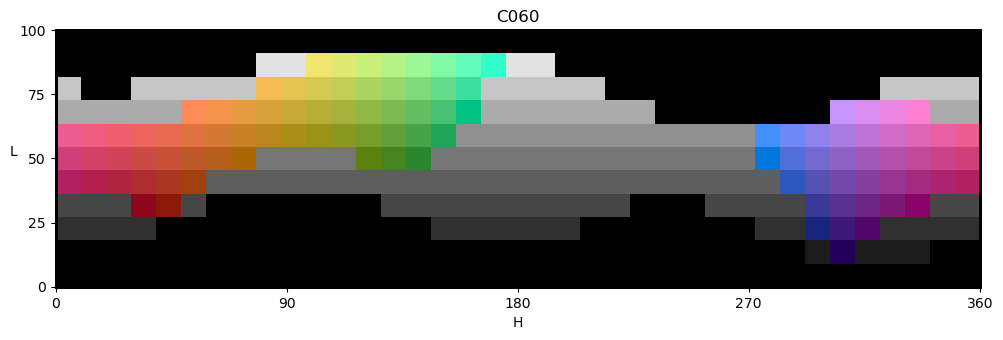

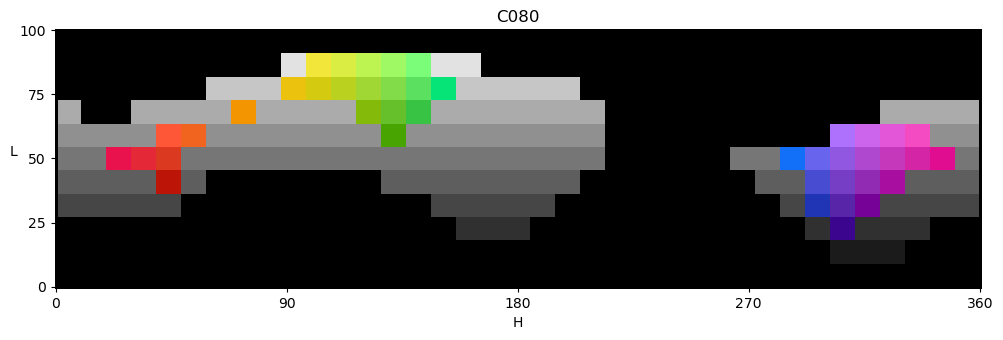

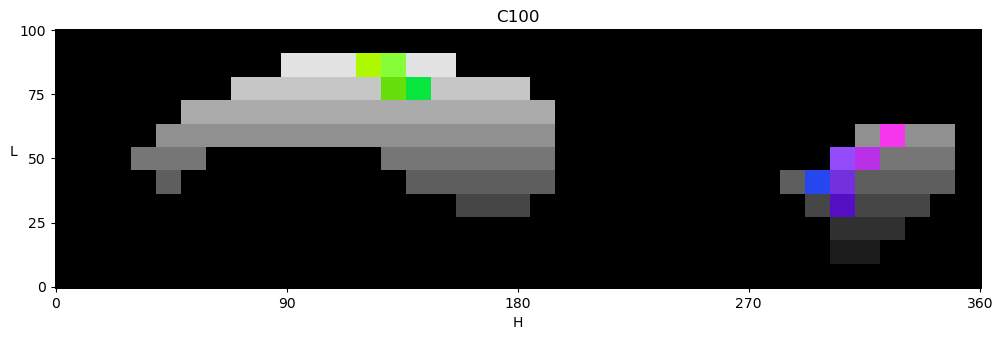

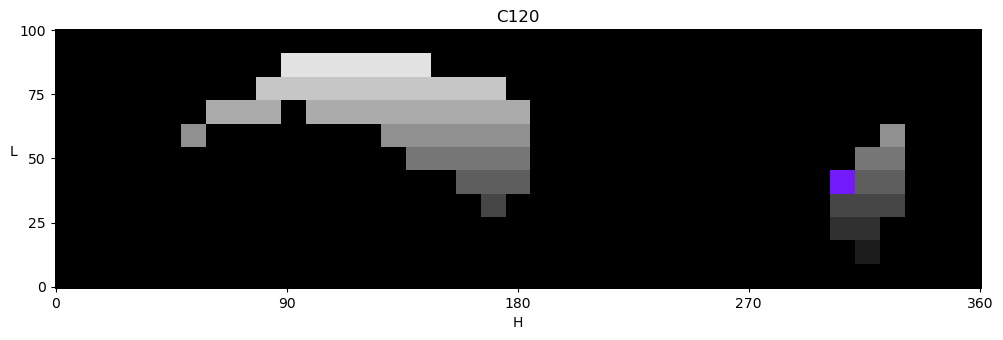

In [5]:
%time slices.LH_planes(C=np.linspace(20,120,6),L=[0,100],H=[0,360],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

We can fill-in the missing colours (grayed-out regions) by clipping the RGB values into gamut (but then we no longer control the actual values of L,C,H at each pixel).

writing ./slices/LHplane_crop_axon_C050.png
writing ./slices/LHplane_clip_axon_C050.png
CPU times: user 151 ms, sys: 5.17 ms, total: 156 ms
Wall time: 157 ms


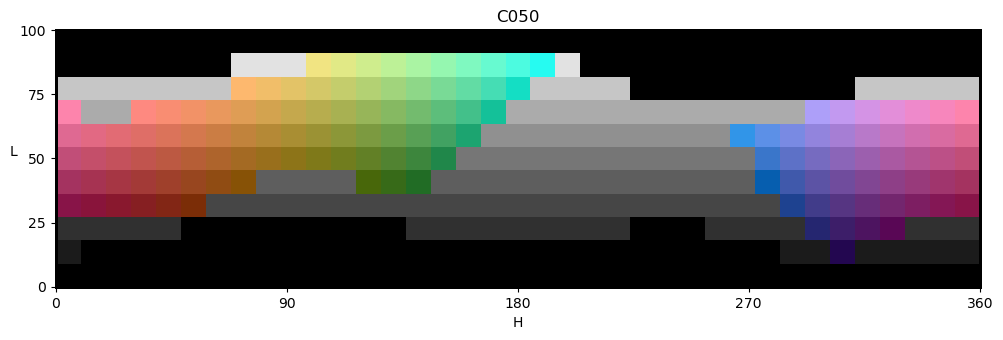

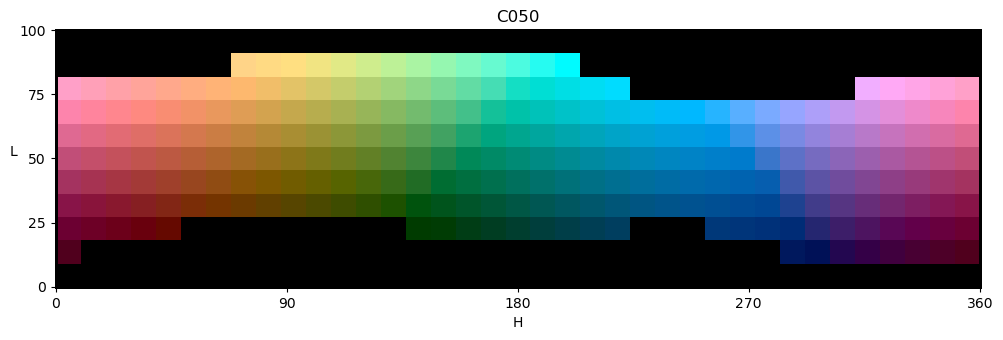

In [6]:
%time arr = slices.LH_plane(C=50,L=[0,100],H=[0,360],res=0.1,axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

Note that, at low resolution, the Mach banding effect is clearly visible: the edges of rows at different L show spurious gradients in L.<br>By increasing the resolution we get a continous looking image (although technically, CIE Lab and LCH spaces are low-spatial frequency models: they do not take into account the interplay between distinct nearby colours).

writing ./slices/LHplane_crop_axon_C050.png
writing ./slices/LHplane_clip_axon_C050.png
CPU times: user 181 ms, sys: 3.62 ms, total: 185 ms
Wall time: 184 ms


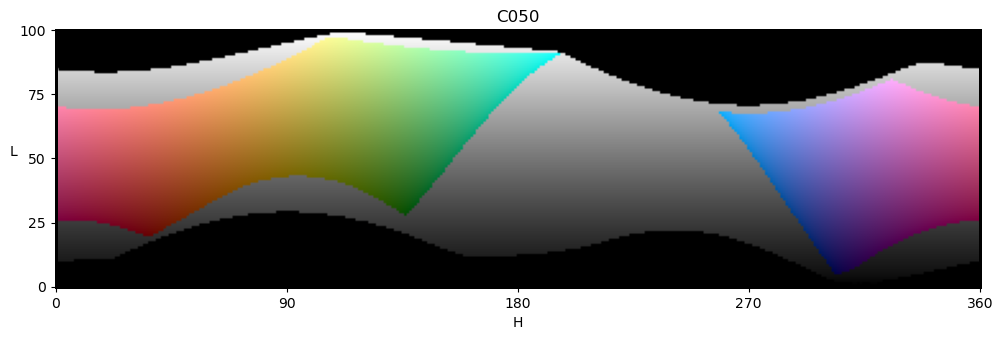

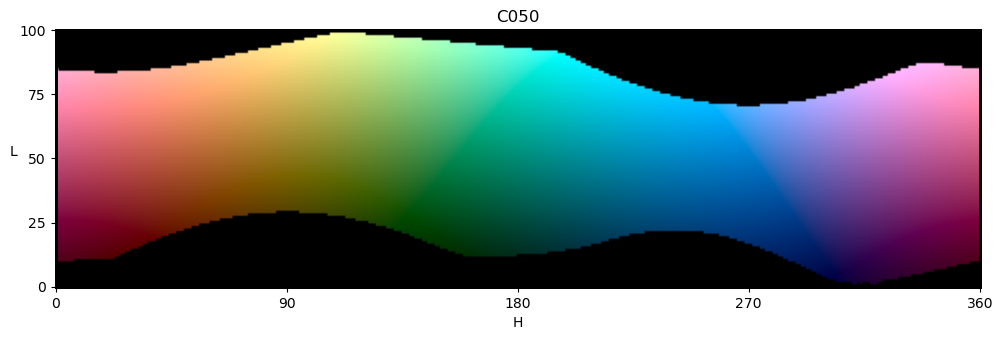

In [7]:
%time arr = slices.LH_plane(C=50,L=[0,100],H=[0,360],res=1,axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

### LH at Cmax

We can map the entire LH plane, at Cmax (defined per pixel or per row).

Maximum C for each (H,L) independently:

writing ./slices/LHplane_crop_axon_Cmaxmax.png
CPU times: user 76.8 ms, sys: 1.81 ms, total: 78.6 ms
Wall time: 78.2 ms


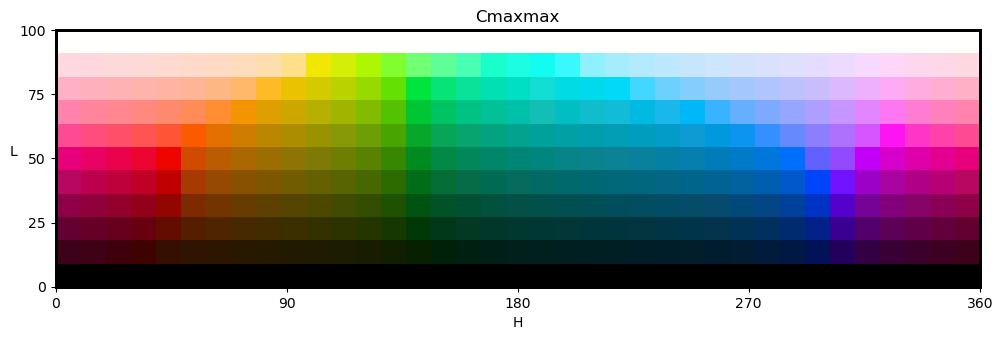

In [8]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=0.1,kinds=['max'],modes=['crop'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

writing ./slices/LHplane_crop_axon_Cmaxmax.png
CPU times: user 109 ms, sys: 1.51 ms, total: 110 ms
Wall time: 109 ms


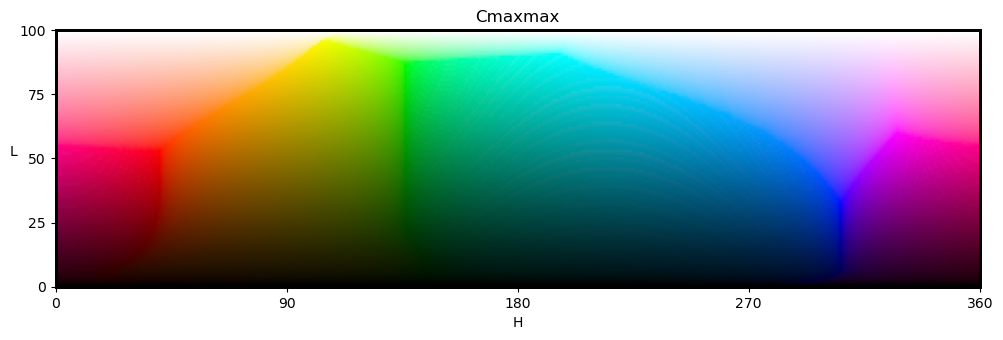

In [9]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=1,kinds=['max'],modes=['crop'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

Maximum C that accomodates all H at a given L:

writing ./slices/LHplane_crop_axon_Cmaxequ.png
CPU times: user 76.6 ms, sys: 1.5 ms, total: 78.1 ms
Wall time: 77.4 ms


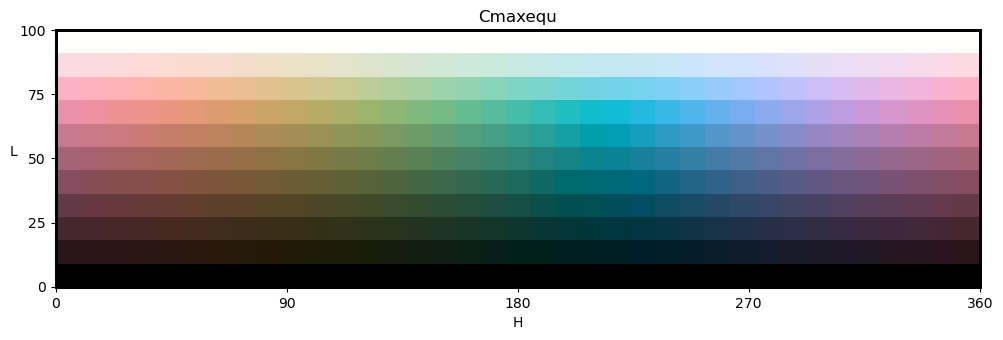

In [10]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=0.1,kinds=['equ'],modes=['crop'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

Each row is the most possible uniform hhue circle that can be generated at that L.

writing ./slices/LHplane_crop_axon_Cmaxequ.png
CPU times: user 111 ms, sys: 3.76 ms, total: 115 ms
Wall time: 114 ms


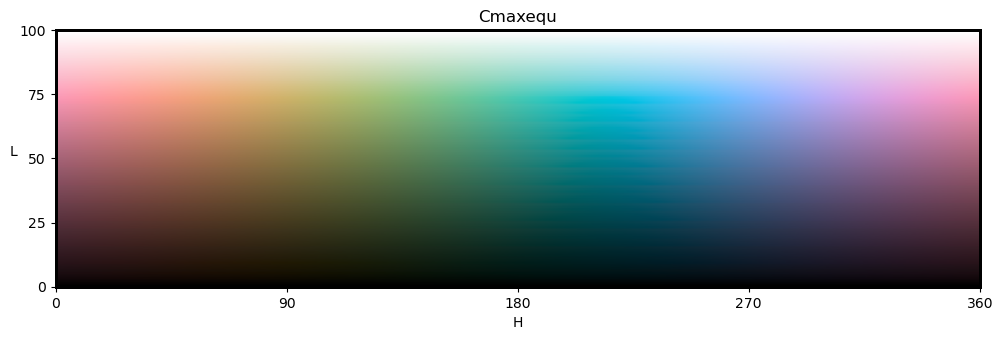

In [11]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=1,kinds=['equ'],modes=['crop'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

## CH slice for a given L

In [12]:
figsize = (8,8*2/3.6)

writing ./slices/CHplane_crop_axon_L020.png
writing ./slices/CHplane_crop_axon_L040.png
writing ./slices/CHplane_crop_axon_L060.png
writing ./slices/CHplane_crop_axon_L080.png
CPU times: user 284 ms, sys: 4.2 ms, total: 288 ms
Wall time: 287 ms


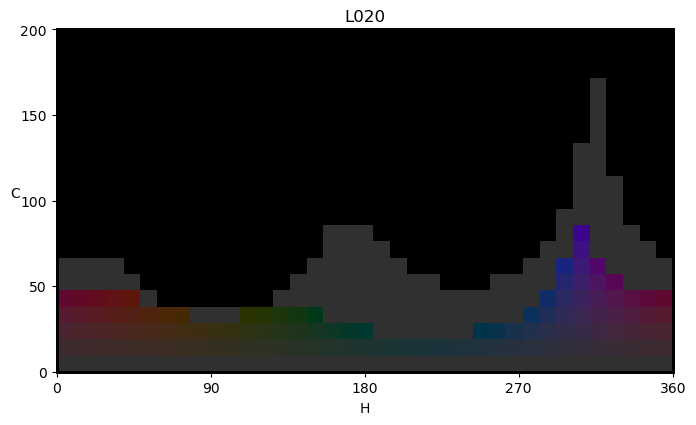

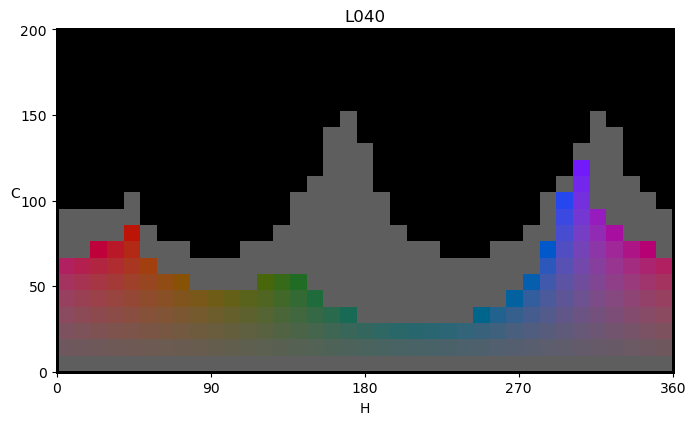

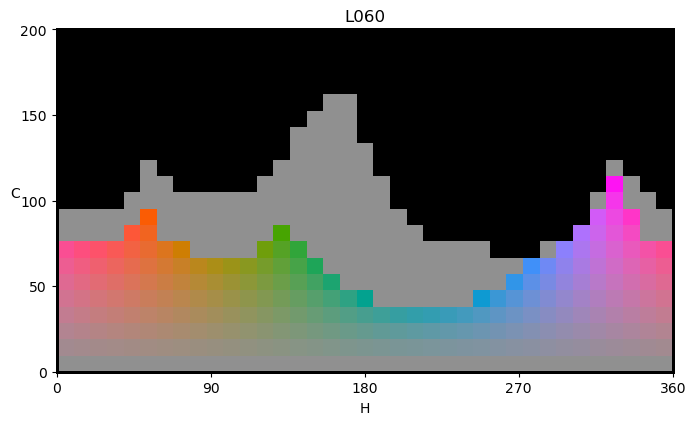

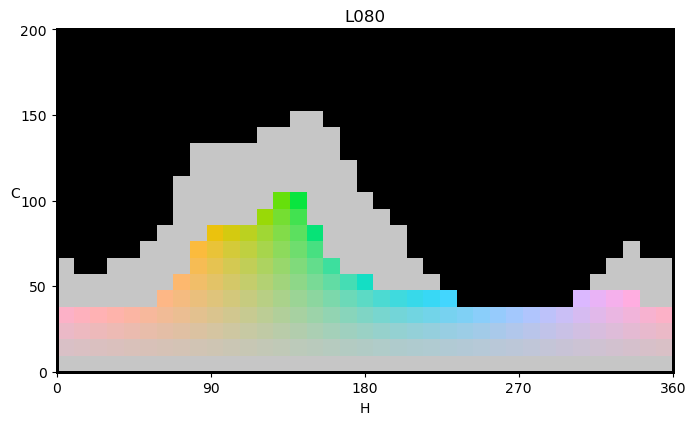

In [13]:
%time slices.CH_planes(L=np.linspace(20,80,4),C=[0,200],H=[0,360],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

Filling-in missing colours

writing ./slices/CHplane_crop_axon_L050.png
writing ./slices/CHplane_clip_axon_L050.png
CPU times: user 148 ms, sys: 3.17 ms, total: 151 ms
Wall time: 151 ms


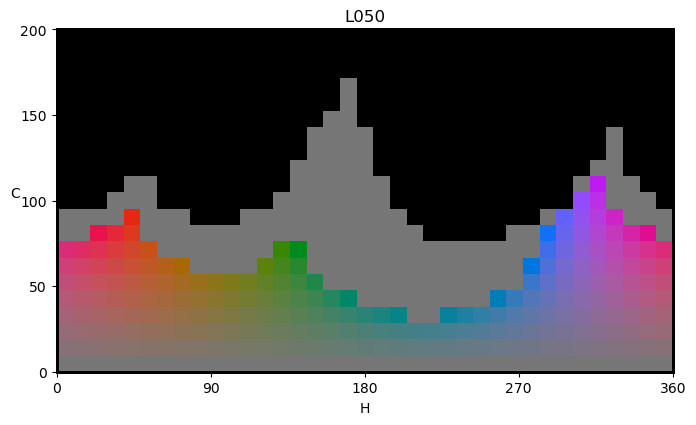

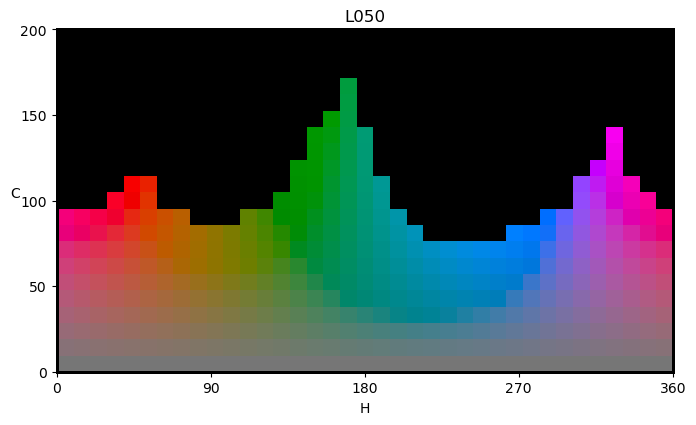

In [14]:
%time arr = slices.CH_plane(L=50,C=[0,200],H=[0,360],res=0.1,modes=['crop','clip'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

Increasing the resolution

writing ./slices/CHplane_crop_axon_L050.png
writing ./slices/CHplane_clip_axon_L050.png
CPU times: user 188 ms, sys: 2.32 ms, total: 191 ms
Wall time: 190 ms


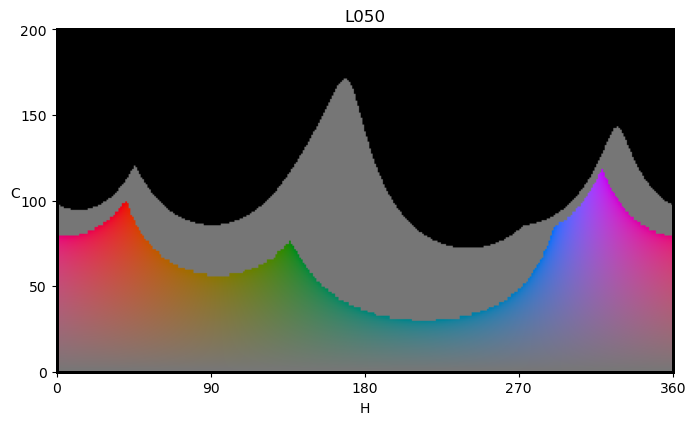

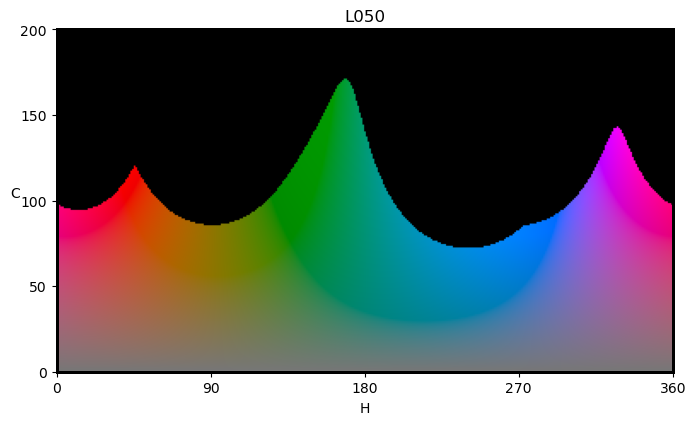

In [15]:
%time arr = slices.CH_plane(L=50,C=[0,200],H=[0,360],res=1,modes=['crop','clip'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

### Stretched to Cmax

These shapes may be stretched to fill rectangular patches, by normalizing C to the Cmax at each L (when ```stretch=True``` parameter ```C``` is expressed as a percentage).

writing ./slices/CHplane_stretch_crop_axon_L050.png
writing ./slices/CHplane_stretch_clip_axon_L050.png
CPU times: user 175 ms, sys: 3.51 ms, total: 178 ms
Wall time: 177 ms


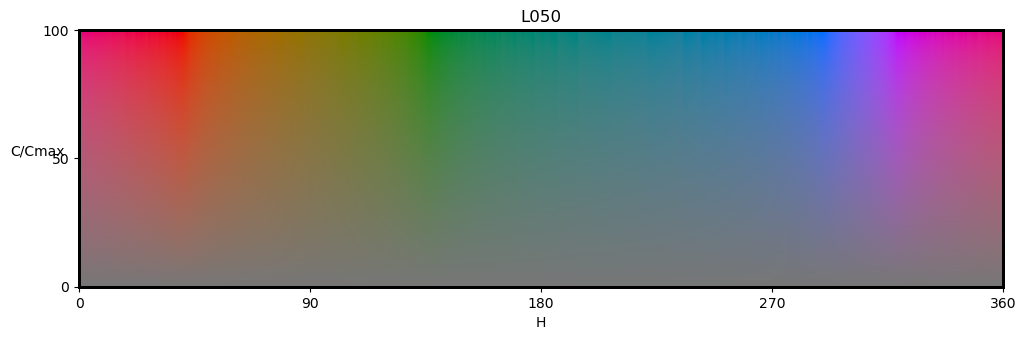

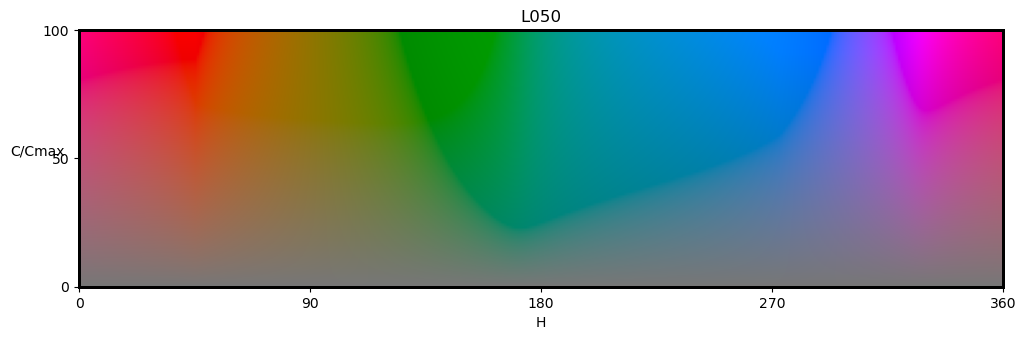

In [16]:
figsize = (12,12*1/3.6)
%time arr = slices.CH_plane(L=50,C=[0,100],stretch=True,H=[0,360],res=1,modes=['crop','clip'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

This is the approach taken for the proposed ["HSL_uv" model](http://www.hsluv.org/comparison/) (for what is called here ```mode='crop'```). This leads to variations in C and L accross the image, the advantage being that the three axes lightness, chroma, hue can be set independently, which makes it easier to pick up colours.

## LC slice for a given H

In [17]:
figsize = (8,8*2/3.6)

writing ./slices/LCplane_crop_axon_H000.png
writing ./slices/LCplane_crop_axon_H090.png
writing ./slices/LCplane_crop_axon_H180.png
writing ./slices/LCplane_crop_axon_H270.png
CPU times: user 270 ms, sys: 4.08 ms, total: 274 ms
Wall time: 273 ms


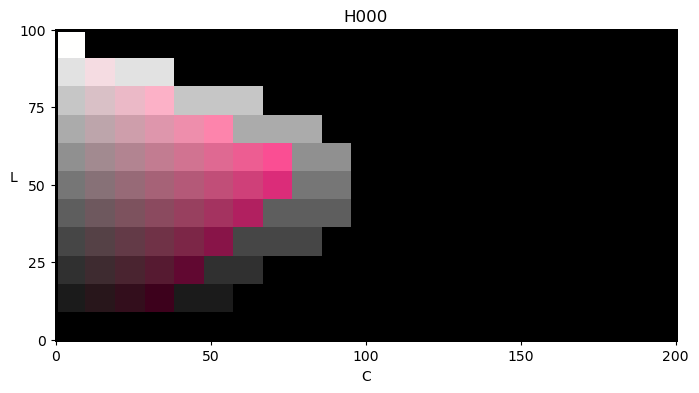

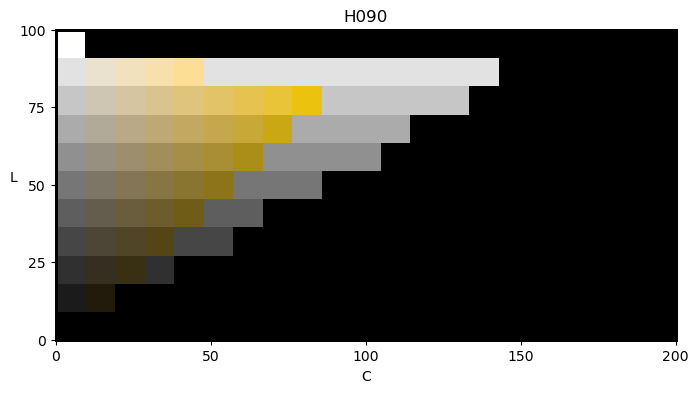

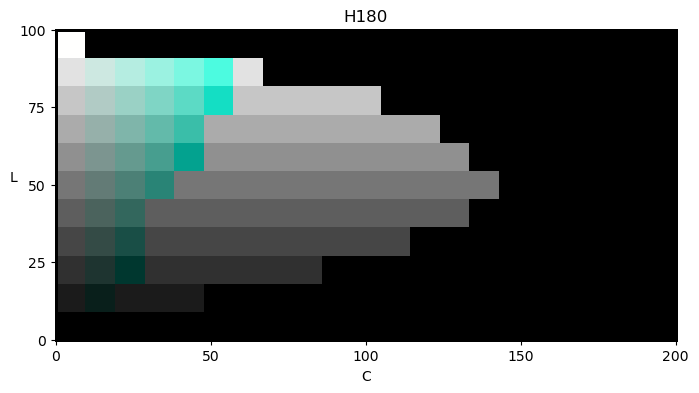

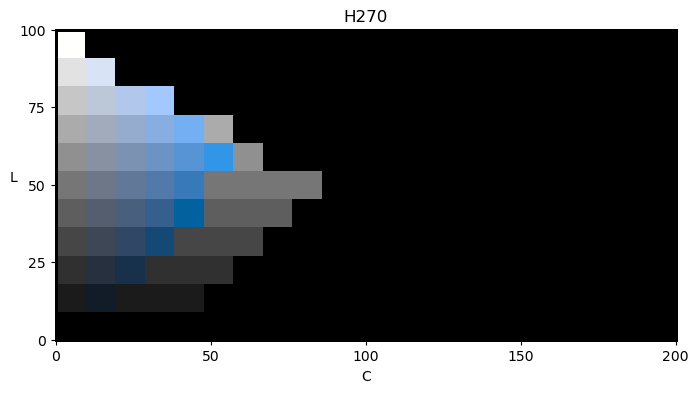

In [18]:
%time slices.LC_planes(H=np.linspace(0,360-90,4),L=[0,100],C=[0,200],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

Filling-in missing colours

writing ./slices/LCplane_crop_axon_H030.png
writing ./slices/LCplane_clip_axon_H030.png
CPU times: user 133 ms, sys: 2.32 ms, total: 136 ms
Wall time: 135 ms


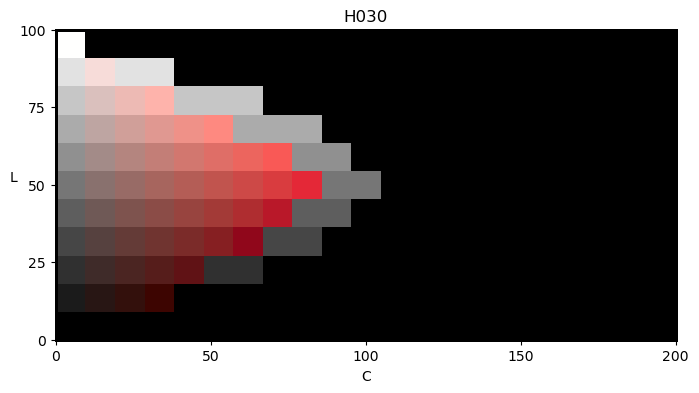

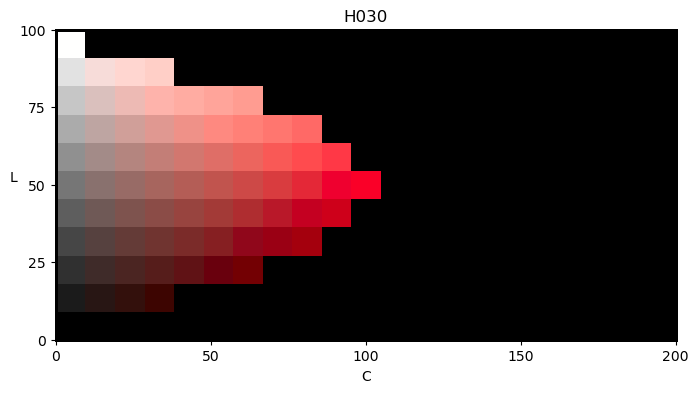

In [19]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,200],res=0.1,modes=['crop','clip'],axes=['on'],figsize=figsize,dpi=dpi,dir=plot_dir)

Increasing the resolution

writing ./slices/LCplane_crop_axon_H030.png
writing ./slices/LCplane_clip_axon_H030.png
CPU times: user 148 ms, sys: 2.45 ms, total: 151 ms
Wall time: 150 ms


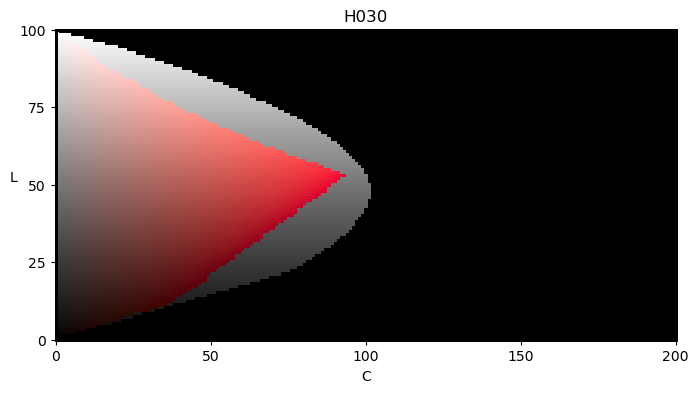

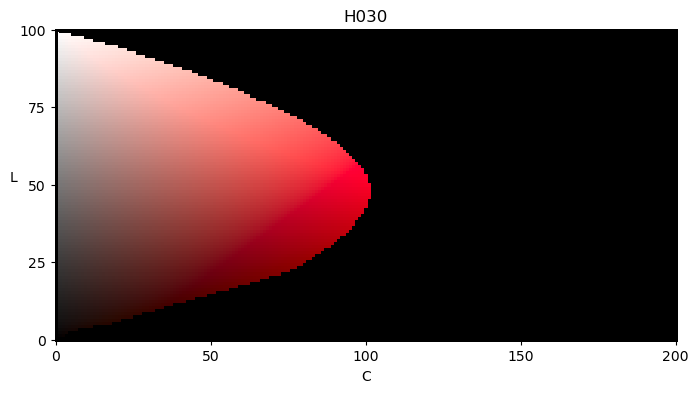

In [20]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,200],res=1,modes=['crop','clip'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

### Stretched to Cmax

These shapes may be stretched to fill rectangular patches, by normalizing C to the Cmax at each L (when ```stretch=True``` parameter ```C``` is expressed as a percentage). This makes them more convenient for use as a colour picker.

writing ./slices/LCplane_stretch_crop_axon_H030.png
CPU times: user 61 ms, sys: 6.82 ms, total: 67.8 ms
Wall time: 67.2 ms


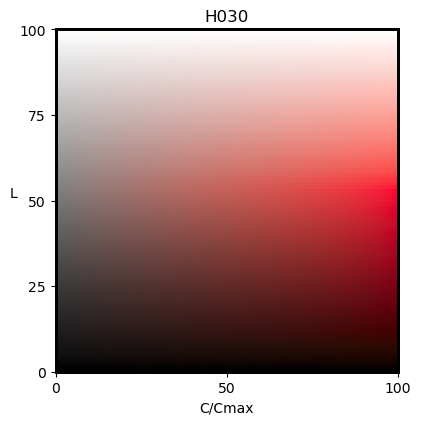

In [21]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,100],stretch=True,res=1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

writing ./slices/LCplane_stretch_crop_axon_H030.png
CPU times: user 69.5 ms, sys: 1.63 ms, total: 71.2 ms
Wall time: 70.4 ms


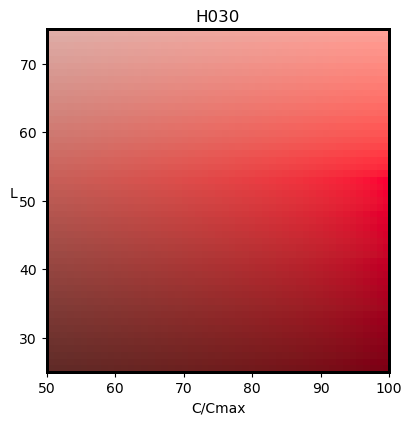

In [22]:
%time arr = slices.LC_plane(H=30,L=[25,75],C=[50,100],stretch=True,res=1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dpi=dpi,dir=plot_dir)

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img align="left" alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br>
<br>Gilles Ferrand
<br>2019-12-24